In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from collections import Counter

def find_duplicate_rows(X):
    Z = X
    # 将数组中的每一行表示为元组，并将这些元组存储在列表中
    row_tuples = [tuple(row) for row in Z]

    # 使用Python的collections.Counter来计算元组的出现次数
    row_counts = Counter(row_tuples)

    # 初始化总的重复次数
    total_duplicate_count = 0

    # 创建一个集合来存储已经计数过的行
    counted_rows = set()

    # 打印重复行的行号（索引）和它们的重复次数，并计算总的重复次数
    for index, row in enumerate(Z):
        row_tuple = tuple(row)
        if row_tuple not in counted_rows:
            count = row_counts[row_tuple]
            if count > 1:
                duplicate_indices = [i for i, r in enumerate(Z) if tuple(r) == row_tuple]
                print(f"行 {index} 重复了 {count} 次，与行 {duplicate_indices} 重复")
                total_duplicate_count += count
            counted_rows.add(row_tuple)  # 将该行添加到已计数的行集合中

    # 打印总的重复次数
    print(f"总的重复次数为: {total_duplicate_count}")

    # 初始化总的不同重复行数
    total_unique_duplicate_count = 0

    # 创建一个集合来存储已经计数过的行
    counted_rows = set()

    # 计算不同的重复行数
    for row_tuple, count in row_counts.items():
        if count > 1:
            total_unique_duplicate_count += 1
            counted_rows.add(row_tuple)

    # 打印总的不同重复行数
    print(f"总的不同重复行数为: {total_unique_duplicate_count}")

In [3]:
import pandas as pd

folder_path = "original_data/"

merged_df = pd.read_csv(folder_path + 'Scaled_dataset.csv', encoding='utf-8', header=0)

columns = merged_df.columns


print(merged_df.shape)

(3960, 121)


# 去除芳基卤化物描述符

In [4]:
columns[19:46]  

Index(['aryl_halide_.C1_NMR_shift', 'aryl_halide_.C1_electrostatic_charge',
       'aryl_halide_.C2_NMR_shift', 'aryl_halide_.C2_electrostatic_charge',
       'aryl_halide_.C3_NMR_shift', 'aryl_halide_.C3_electrostatic_charge',
       'aryl_halide_.C4_NMR_shift', 'aryl_halide_.C4_electrostatic_charge',
       'aryl_halide_.H2_NMR_shift', 'aryl_halide_.H2_electrostatic_charge',
       'aryl_halide_.H3_NMR_shift', 'aryl_halide_.H3_electrostatic_charge',
       'aryl_halide_E_HOMO', 'aryl_halide_E_LUMO', 'aryl_halide_V1_frequency',
       'aryl_halide_V1_intensity', 'aryl_halide_V2_frequency',
       'aryl_halide_V2_intensity', 'aryl_halide_V3_frequency',
       'aryl_halide_V3_intensity', 'aryl_halide_dipole_moment',
       'aryl_halide_electronegativity', 'aryl_halide_hardness',
       'aryl_halide_molecular_volume', 'aryl_halide_molecular_weight',
       'aryl_halide_ovality', 'aryl_halide_surface_area'],
      dtype='object')

In [5]:
# 删除第20列到第46列   #去除芳香卤卤化物的描述符
columns_to_drop = merged_df.columns[19:46]  
merged_df = merged_df.drop(columns=columns_to_drop, axis=1)
print(merged_df.shape)

(3960, 94)


In [4]:
x_exp = merged_df.iloc[:, :-1].values  # 假设编号列是第0列，x列从第2列到倒数第二列
y_exp = merged_df.iloc[:, -1].values  # 最后一列作为y
print(x_exp.shape)
print(y_exp.shape)

(3960, 120)
(3960,)


# 检查重复数据

In [5]:
find_duplicate_rows(x_exp)

总的重复次数为: 0
总的不同重复行数为: 0


# 划分出芳基卤化物的X

In [8]:
x_exp_1 = x_exp[::15, :]
print(x_exp_1.shape)

(264, 93)


In [9]:
find_duplicate_rows(x_exp_1)

总的重复次数为: 0
总的不同重复行数为: 0


# 对x进行minmax+pca+minmax

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_exp_mm = scaler.fit_transform(x_exp)
# x_exp_mm = scaler.fit_transform(x_exp_1)

In [8]:
from sklearn.decomposition import PCA

def PCA_dim_select(selected_method, n_dims):
    if selected_method == 'auto':
        assert type(n_dims) == float
        selected_dim = n_dims
    elif selected_method == 'assigned':
        # assert type(n_dims) == int
        selected_dim = int(n_dims)
    return selected_dim

pca_dims = 0.90
pca = PCA(n_components=PCA_dim_select('auto', pca_dims))

x_exp_mm_pca = pca.fit_transform(x_exp_mm)
print(x_exp_mm_pca.shape)

(3960, 9)


In [9]:
scaler1 = MinMaxScaler()
x_exp_mm_pca_mm = scaler1.fit_transform(x_exp_mm_pca)

# x与y合并为数据集

In [10]:
y_exp_1 = y_exp.reshape(-1,1)
print(y_exp_1.shape)

(3960, 1)


# 划分出各个卤化物的y

In [14]:
y_dict = {}
for i in range(0, 15):
    y_dict[f'y_{i}'] = y_exp_1[i::15, :]
    

In [23]:
max_value = np.max(y_dict['y_0'])
print(max_value)

45.05


In [15]:
# 打印所有 y_i 的 shape
for key, value in y_dict.items():
    print(f"{key} 数据的形状：{value.shape}")

y_0 数据的形状：(264, 1)
y_1 数据的形状：(264, 1)
y_2 数据的形状：(264, 1)
y_3 数据的形状：(264, 1)
y_4 数据的形状：(264, 1)
y_5 数据的形状：(264, 1)
y_6 数据的形状：(264, 1)
y_7 数据的形状：(264, 1)
y_8 数据的形状：(264, 1)
y_9 数据的形状：(264, 1)
y_10 数据的形状：(264, 1)
y_11 数据的形状：(264, 1)
y_12 数据的形状：(264, 1)
y_13 数据的形状：(264, 1)
y_14 数据的形状：(264, 1)


In [19]:
# 循环保存
columns = [f'x{i+1}' for i in range(x_exp_mm_pca_mm.shape[1])]
x_df = pd.DataFrame(x_exp_mm_pca_mm, columns=columns)

for i in range(0, 15):
    y_df = pd.DataFrame(y_dict[f'y_{i}'], columns=['yield'])
    merged_data = pd.concat([x_df, y_df], axis=1)
    file_name = f'original_processed/aryl-{i+1}.xlsx'
    merged_data.to_excel(file_name, index=False)

print("所有文件已保存完毕。")

所有文件已保存完毕。


# 保存单个数据

In [13]:
X_all = x_exp_mm_pca_mm
Y_all = y_exp_1

print(X_all.shape,Y_all.shape)


(3960, 9) (3960, 1)


In [14]:
#去除存在nan的点
nan_indices = np.isnan(Y_all)
true_indices = np.where(nan_indices)[0]
print("nan 的索引:", true_indices)

X_all = X_all[~nan_indices.flatten()]
Y_all = Y_all[~nan_indices.flatten()]

print(X_all.shape,Y_all.shape)

nan 的索引: [696 741 796 797 884]
(3955, 9) (3955, 1)


In [15]:
# 单个保存
columns = [f'x{i+1}' for i in range(X_all.shape[1])]
x_df = pd.DataFrame(X_all, columns=columns)

y_df = pd.DataFrame(Y_all, columns=['yield'])

merged_data = pd.concat([x_df, y_df], axis=1)
merged_data.to_excel('original_processed/all_data.xlsx', index=False)

In [17]:
max_value = np.max(Y_all)
print(max_value)

100.0


In [18]:
find_duplicate_rows(X_all)
find_duplicate_rows(Y_all)

总的重复次数为: 0
总的不同重复行数为: 0
行 1 重复了 3 次，与行 [1, 2575, 3787] 重复
行 3 重复了 2 次，与行 [3, 87] 重复
行 8 重复了 2 次，与行 [8, 1493] 重复
行 9 重复了 2 次，与行 [9, 1087] 重复
行 11 重复了 3 次，与行 [11, 645, 2615] 重复
行 13 重复了 2 次，与行 [13, 1134] 重复
行 14 重复了 3 次，与行 [14, 1584, 3265] 重复
行 15 重复了 3 次，与行 [15, 1842, 3287] 重复
行 17 重复了 2 次，与行 [17, 3761] 重复
行 20 重复了 2 次，与行 [20, 851] 重复
行 21 重复了 2 次，与行 [21, 2011] 重复
行 22 重复了 2 次，与行 [22, 2460] 重复
行 27 重复了 2 次，与行 [27, 222] 重复
行 29 重复了 4 次，与行 [29, 600, 2414, 3602] 重复
行 31 重复了 2 次，与行 [31, 2675] 重复
行 33 重复了 6 次，与行 [33, 1048, 1828, 2656, 2713, 3688] 重复
行 34 重复了 2 次，与行 [34, 2698] 重复
行 39 重复了 2 次，与行 [39, 3387] 重复
行 44 重复了 2 次，与行 [44, 2185] 重复
行 45 重复了 2 次，与行 [45, 2692] 重复
行 48 重复了 236 次，与行 [48, 63, 78, 183, 198, 213, 288, 291, 306, 318, 333, 336, 348, 351, 396, 423, 468, 471, 483, 558, 573, 776, 777, 824, 827, 898, 913, 916, 958, 1033, 1135, 1138, 1139, 1141, 1147, 1150, 1153, 1154, 1156, 1162, 1180, 1228, 1231, 1243, 1318, 1321, 1327, 1333, 1336, 1342, 1408, 1453, 1468, 1495, 1498, 1507, 1513, 1

行 833 重复了 2 次，与行 [833, 1223] 重复
行 834 重复了 2 次，与行 [834, 3647] 重复
行 836 重复了 2 次，与行 [836, 3428] 重复
行 841 重复了 3 次，与行 [841, 1609, 2226] 重复
行 842 重复了 2 次，与行 [842, 2926] 重复
行 845 重复了 2 次，与行 [845, 2610] 重复
行 849 重复了 2 次，与行 [849, 1385] 重复
行 854 重复了 3 次，与行 [854, 1885, 2086] 重复
行 857 重复了 3 次，与行 [857, 1669, 2072] 重复
行 862 重复了 2 次，与行 [862, 1070] 重复
行 867 重复了 2 次，与行 [867, 1538] 重复
行 871 重复了 2 次，与行 [871, 2243] 重复
行 872 重复了 2 次，与行 [872, 2160] 重复
行 878 重复了 2 次，与行 [878, 1545] 重复
行 883 重复了 2 次，与行 [883, 3742] 重复
行 886 重复了 2 次，与行 [886, 1706] 重复
行 887 重复了 2 次，与行 [887, 1533] 重复
行 895 重复了 4 次，与行 [895, 2203, 2491, 3391] 重复
行 897 重复了 2 次，与行 [897, 2210] 重复
行 900 重复了 2 次，与行 [900, 3896] 重复
行 901 重复了 3 次，与行 [901, 1645, 2380] 重复
行 903 重复了 2 次，与行 [903, 3542] 重复
行 904 重复了 2 次，与行 [904, 2822] 重复
行 906 重复了 2 次，与行 [906, 1025] 重复
行 910 重复了 2 次，与行 [910, 1926] 重复
行 912 重复了 2 次，与行 [912, 1833] 重复
行 922 重复了 3 次，与行 [922, 944, 2387] 重复
行 931 重复了 2 次，与行 [931, 3766] 重复
行 941 重复了 2 次，与行 [941, 1095] 重复
行 946 重复了 2 次，与行 [946, 2626] 重复

行 2594 重复了 2 次，与行 [2594, 3907] 重复
行 2608 重复了 2 次，与行 [2608, 2618] 重复
行 2611 重复了 2 次，与行 [2611, 3291] 重复
行 2612 重复了 2 次，与行 [2612, 3920] 重复
行 2616 重复了 3 次，与行 [2616, 2633, 3866] 重复
行 2617 重复了 2 次，与行 [2617, 3393] 重复
行 2627 重复了 2 次，与行 [2627, 2648] 重复
行 2671 重复了 2 次，与行 [2671, 3811] 重复
行 2674 重复了 2 次，与行 [2674, 3175] 重复
行 2688 重复了 2 次，与行 [2688, 3552] 重复
行 2706 重复了 2 次，与行 [2706, 3633] 重复
行 2721 重复了 2 次，与行 [2721, 3654] 重复
行 2727 重复了 3 次，与行 [2727, 2862, 3585] 重复
行 2742 重复了 2 次，与行 [2742, 2879] 重复
行 2748 重复了 2 次，与行 [2748, 3529] 重复
行 2757 重复了 2 次，与行 [2757, 2786] 重复
行 2763 重复了 2 次，与行 [2763, 3062] 重复
行 2764 重复了 2 次，与行 [2764, 3512] 重复
行 2773 重复了 2 次，与行 [2773, 3778] 重复
行 2781 重复了 2 次，与行 [2781, 2825] 重复
行 2783 重复了 2 次，与行 [2783, 3819] 重复
行 2788 重复了 2 次，与行 [2788, 2947] 重复
行 2790 重复了 2 次，与行 [2790, 3017] 重复
行 2801 重复了 2 次，与行 [2801, 3581] 重复
行 2802 重复了 2 次，与行 [2802, 3077] 重复
行 2810 重复了 2 次，与行 [2810, 2988] 重复
行 2827 重复了 2 次，与行 [2827, 3132] 重复
行 2852 重复了 2 次，与行 [2852, 3660] 重复
行 2853 重复了 2 次，与行 [2853, 3438] 重复
行 

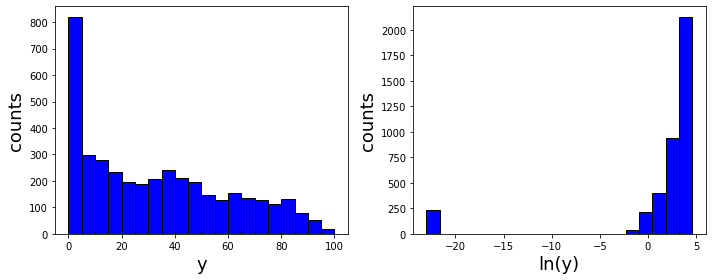

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# 创建一个2x1的子图
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# 绘制原始y的分布直方图
axes[0].hist(Y_all, bins=20, color='blue', edgecolor='black')

axes[0].set_xlabel('y', fontsize=18)  # 设置x轴标签的字体大小为16
axes[0].set_ylabel('counts', fontsize=18)   # 设置y轴标签的字体大小为16
axes[0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

y_all_log = np.log(Y_all + 1e-10)

# 绘制对数变换后y的分布直方图
axes[1].hist(y_all_log, bins=20, color='blue', edgecolor='black')
# sns.histplot(y_log, kde=True, color='blue', ax=axes[1])
axes[1].set_xlabel('ln(y)', fontsize=18)  # 设置x轴标签的字体大小为16
axes[1].set_ylabel('counts', fontsize=18)  # 设置y轴标签的字体大小为16
# 设置纵坐标只显示整数
axes[1].yaxis.set_major_locator(plt.MaxNLocator(integer=True))


# # 获取直方图的频率
# heights = [p.get_height() for p in axes[1].patches]
# # 只显示整数值并确保数字不与直方图重叠
# for i, height in enumerate(heights):
#     if height.is_integer():  # 检查是否为整数
#         axes[1].annotate(str(int(height)), (axes[1].patches[i].get_x() + axes[1].patches[i].get_width() / 2, height),
#                          ha='center', va='bottom', fontsize=10, color='black')


plt.tight_layout()  # 调整子图布局以防止重叠
plt.show()

